<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 기본 옵션

In [1]:
# 해당 옵션을 사용하지 않으면 한글 깨짐..
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

# 기본 데이터 분석 (EDA복습)

# 타이타닉 데이터

In [4]:
# 추가 라이브러리 임포트
import seaborn as sns

# 데이터 읽어 들이기
df_titanic = sns.load_dataset("titanic")

# 우리말 필드명 정의
columns_t = [ '생존', '선실등급', '성별', '연령', '형제_및_배우자_수',
              '부모_및_자녀_수', '요금', '승선항_코드', '선실등급명',
              '남녀어린이_구분', '성인_남성_여부', '데크번호', '승선항', '생존_여부', '독신_여부']
df_titanic.columns = columns_t

# 데이터 내용 확인
display(df_titanic.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,선실등급명,남녀어린이_구분,성인_남성_여부,데크번호,승선항,생존_여부,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


| 컬럼 | 설명 |
| --- | --- |
| 생존 (survival) | (0=사망, 1=생존)
| 선실등급 (pclass) | (1=1등실, 2=2등실, 3=3등실)
| 성별(sex) | (male=남성, female=여성)
| 연령(age)
| 형제 및 배우자 수(sibsp) | 동승한 형제 혹은 배우자의 수
| 부모 및 자녀 수(parch) | 동승한 부모 혹은 자녀의 수
| 요금(fare)
| 승선항 코드(embarked) | (C=Cherbourg, Q=Queenstown, S=Southampton)
| 선실등급명(class) | (First=1등실, Second=2등실, Third=3등실)
| 남녀어린이 구분(who) | (man=성인 남성, woman=성인 여성, child=어린이)
| 성인 남성 여부(adult_male) | True/False
| 데크번호(deck) | 선실번호의 머리글자 (A부터 G까지)
| 승선항(embark_town) | Southampton/Cherbourg/Queenstown
| 생존 여부(alive) | yes / no
| 독신 여부(alone) | True/ False

In [5]:
# 필드 값의 갯수 집계(범주형)

# '승선항' 필드의 필드 값 개수를 집계
print(df_titanic['승선항'].value_counts())
print()

# '생존_여부' 필드의 필드 값 개수를 집계
print(df_titanic['생존_여부'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 승선항, dtype: int64

no     549
yes    342
Name: 생존_여부, dtype: int64


In [6]:
# 수치형 데이터
display(df_titanic.describe())

,생존,선실등급,연령,형제_및_배우자_수,부모_및_자녀_수,요금
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [7]:
# groupby를 사용하여 범주별 집계 하기
display(df_titanic.groupby('성별').mean())

,생존,선실등급,연령,형제_및_배우자_수,부모_및_자녀_수,요금,성인_남성_여부,독신_여부
성별,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


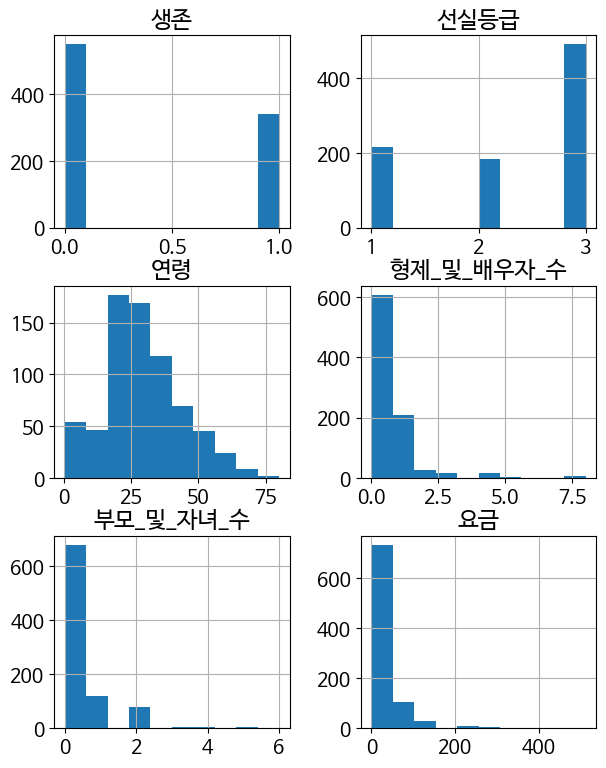

In [8]:
# 여러변수 그래프 그리기
# 분석 대상 필드의 그래프 출력 (숫자 필드)

# 숫자 필드의 필드명 정의
columns_n = ['생존', '선실등급', '연령', '형제_및_배우자_수', '부모_및_자녀_수', '요금']

# 그래프 작도 영역 조정
plt.rcParams['figure.figsize'] = (7, 9)

# 데이터프레임의 숫자 필드에 대해 히스토그램을 출력
df_titanic[columns_n].hist()
plt.show()

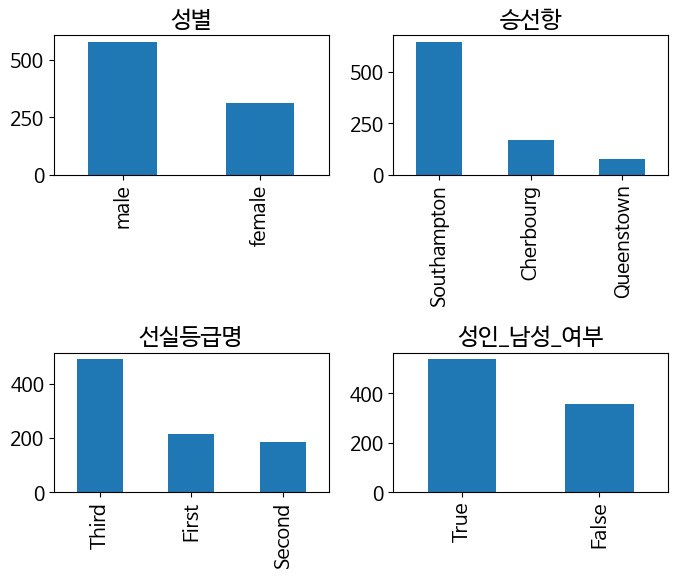

In [9]:
# 범주형 변수 그래프 그리기
# 분석 대상 필드의 그래프 출력 (숫자 값이 아닌 필드)

# 그래프를 그릴 필드의 필드명 정의
columns_c = ['성별', '승선항', '선실등급명', '성인_남성_여부']

# 그래프 작도 영역 조정
plt.rcParams['figure.figsize'] = (7, 6)

# 반복문을 돌며 히스토그램을 그린다
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 데이터 전처리

In [10]:
print(df_titanic.shape)

(891, 15)


In [11]:
display(df_titanic.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,선실등급명,남녀어린이_구분,성인_남성_여부,데크번호,승선항,생존_여부,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# 불필요한 변수 제거
# 중복되는 필드를 제거한다

# "선실등급명" ("선실등급"과 중복)
df1 = df_titanic.drop('선실등급명', axis=1)

# "승선항" ("승선항 코드"와 중복)
df2 = df1.drop('승선항', axis=1)

# "생존 여부" ("생존"과 중복)
df3 = df2.drop('생존_여부', axis=1)

# 결과 확인
display(df3.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,NaN,True


In [13]:
# Null값 확인하기

# 숫자 "." 문자 "" -> Null
# NaN / NA

# "        "
# "na"
# "naN"
# "Null_value"
# "$$$$$"

display(df3.isnull().sum())

생존              0
선실등급            0
성별              0
연령            177
형제_및_배우자_수      0
부모_및_자녀_수       0
요금              0
승선항_코드          2
남녀어린이_구분        0
성인_남성_여부        0
데크번호          688
독신_여부           0
dtype: int64

In [14]:
display(df3['데크번호'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: 데크번호, dtype: int64

누락값 처리하는 방법

1. 승선항 코드 : 누락값이 2건 -> 행 전체 삭제
2. 연령 : 누락값 177건 -> 필드값의 평균값으로 대체
3. 데크번호 : 누락값이 688건 -> Null을 의미하는 임의값 대체

In [16]:
# 승선항_코드: 누락 값이 2건(적음)
# -> 행 전체를 삭제

# dropna 함수를 사용
df4 = df3.dropna(subset = ['승선항_코드'])

# 연령: 숫자 데이터이며 누락 값이 177건(꽤 많음)
# -> 필드 값의 평균값으로 누락 값을 대체

# 평균값 계산
age_average = df4['연령'].mean()

# fillna 함수를 사용
df5 = df4.fillna({'연령': age_average})

# 데크번호: 코드값 필드이며 누락 값이 688건(아주 많음)
# -> 누락 값을 의미하는 더미 코드를 부여함

# replace 함수를 사용 (더미코드는 N)
#df6 = df5.replace({'데크번호': {np.nan: 'N'}})
df5['데크번호'] = df5['데크번호'].astype(np.str)
df6 = df5.fillna({'데크번호' : 'N'})

In [17]:
# 결과 확인
display(df6.isnull().sum())

display(df6.head())

생존            0
선실등급          0
성별            0
연령            0
형제_및_배우자_수    0
부모_및_자녀_수     0
요금            0
승선항_코드        0
남녀어린이_구분      0
성인_남성_여부      0
데크번호          0
독신_여부         0
dtype: int64

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,man,True,nan,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,nan,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,nan,True


범주형 변수 처리

1. 성별: male / female
2. 성인_남성_여부: True / False
3. 독신_여부: True / False

-> 위 필드의 값을 각각 1 / 0으로 변환

In [19]:
display(df6['성별'].value_counts())

male      577
female    312
Name: 성별, dtype: int64

In [20]:
# 딕셔너리 mf_map을 정의
mf_map = {'male': 1, 'female': 0}

# map 함수를 사용해 레이블을 수치로 변환
df7 = df6.copy()
df7['성별'] = df7['성별'].map(mf_map)

# 결과 확인
display(df7.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,1,22.0000,1,0,7.2500,S,man,True,nan,False
1,1,1,0,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,0,26.0000,0,0,7.9250,S,woman,False,nan,True
3,1,1,0,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,1,35.0000,0,0,8.0500,S,man,True,nan,True


In [21]:
# 성인 남성 여부 처리
display(df7['성인_남성_여부'].value_counts())

True     537
False    352
Name: 성인_남성_여부, dtype: int64

In [22]:
# 딕셔너리 tf_map을 정의
tf_map = {True: 1, False: 0}

# map 함수를 사용해 레이블을 수치로 변환
df8 = df7.copy()
df8['성인_남성_여부'] = df8['성인_남성_여부'].map(tf_map)

# map 함수를 사용해 레이블을 수치로 변환
df9 = df8.copy()
df9['독신_여부'] = df8['독신_여부'].map(tf_map)

# 결과 확인
display(df9.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,1,22.0000,1,0,7.2500,S,man,1,nan,0
1,1,1,0,38.0000,1,0,71.2833,C,woman,0,C,0
2,1,3,0,26.0000,0,0,7.9250,S,woman,0,nan,1
3,1,1,0,35.0000,1,0,53.1000,S,woman,0,C,0
4,0,3,1,35.0000,0,0,8.0500,S,man,1,nan,1


In [23]:
# 3가지 이상 범주 처리

# 변환 전
display(df9[['남녀어린이_구분']].head(10))

,남녀어린이_구분
0,man
1,woman
2,woman
3,woman
4,man
5,man
6,man
7,child
8,woman
9,child


> [pandas] get_dummies 함수
- One-Hot Encoding

In [24]:
# get_dummies 함수의 사용 예제

w = pd.get_dummies(df9['남녀어린이_구분'], prefix='남녀어린이_구분')
display(w.head(10))

,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [25]:
# get_dummies 함수를 사용해 정의한
# 범주값을 원-핫 벡터로 변환하는 함수
# df 대상 데이터프레임
# column 대상 필드

def enc(df, column):
    # 원-핫 벡터 생성
    df_dummy = pd.get_dummies(df[column], prefix=column)
    # 기존 필드 삭제
    df_drop = df.drop([column], axis=1)
    # 데이터프레임과 원-핫 인코딩 필드를 결합
    df1 = pd.concat([df_drop, df_dummy],axis=1)
    return df1

In [26]:
# 레이블값 확인하기
display(df9['남녀어린이_구분'].value_counts())

man      537
woman    269
child     83
Name: 남녀어린이_구분, dtype: int64

In [27]:
# 원-핫 인코딩 적용

# 남녀어린이_구분 필드
df10 = enc(df9, '남녀어린이_구분')

# 결과 확인하기
display(df10.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,성인_남성_여부,데크번호,독신_여부,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman
0,0,3,1,22.0000,1,0,7.2500,S,1,nan,0,0,1,0
1,1,1,0,38.0000,1,0,71.2833,C,0,C,0,0,0,1
2,1,3,0,26.0000,0,0,7.9250,S,0,nan,1,0,0,1
3,1,1,0,35.0000,1,0,53.1000,S,0,C,0,0,0,1
4,0,3,1,35.0000,0,0,8.0500,S,1,nan,1,0,1,0


In [28]:
# 원-핫 인코딩 적용

# 승선항_코드 필드
df11 = enc(df10, '승선항_코드')

# 데크번호 필드
df12 = enc(df11, '데크번호')

# 결과 확인하기
display(df12.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,성인_남성_여부,독신_여부,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman,승선항_코드_C,승선항_코드_Q,승선항_코드_S,데크번호_A,데크번호_B,데크번호_C,데크번호_D,데크번호_E,데크번호_F,데크번호_G,데크번호_nan
0,0,3,1,22.0000,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0000,1,0,71.2833,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,35.0000,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0000,0,0,8.0500,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


## 데이터 정규화

StandardScaler
- 평균 0, 표준편차 1인 정규 분포로 데이터 변환

In [29]:
# 정규화

df13 = df12.copy()
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df13[['연령', '요금']] = stdsc.fit_transform(df13[['연령', '요금']])

# 결과 확인하기
display(df13.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,성인_남성_여부,독신_여부,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman,승선항_코드_C,승선항_코드_Q,승선항_코드_S,데크번호_A,데크번호_B,데크번호_C,데크번호_D,데크번호_E,데크번호_F,데크번호_G,데크번호_nan
0,0,3,1,-0.5896,1,0,-0.5002,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0.6448,1,0,0.7889,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,-0.2810,0,0,-0.4866,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0.4134,1,0,0.4229,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,0.4134,0,0,-0.4841,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


# 아이리스 데이터

아이리스 데이터 집합의 필드 목록

- 꽃받침 길이 (sepal_length)
- 꽃받침 폭 (sepal_width)
- 꽃잎 길이 (petal_length)
- 꽃잎 폭 (petal_width)
- 종 (species): versicolor/setosa/virginica

In [55]:
# 추가 라이브러리 임포트
import seaborn as sns

# 데이터 읽어 들이기
df_iris = sns.load_dataset("iris")

# 우리말 필드명 정의
columns_i = ['꽃받침_길이', '꽃받침_폭', '꽃잎_길이', '꽃잎_폭', '종']
df_iris.columns = columns_i

# 데이터 내용 확인
display(df_iris.head())

,꽃받침_길이,꽃받침_폭,꽃잎_길이,꽃잎_폭,종
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


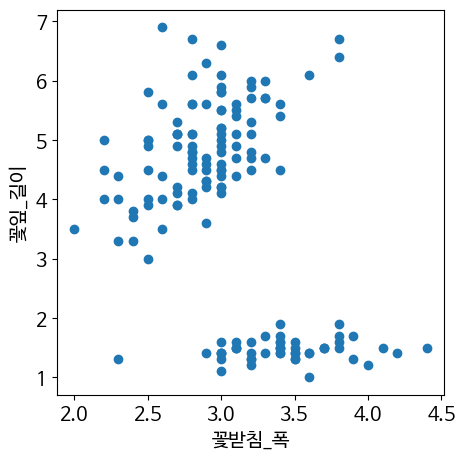

In [33]:
# matplotlib을 이용해 산포도 그리기

# 그래프 작도 영역을 조정
plt.figure(figsize=(5, 5))

# 산포도 그리기
plt.scatter(df_iris['꽃받침_폭'], df_iris['꽃잎_길이'])

# 레이블 표시
# sepal 꽃받침 petal 꽃잎
plt.xlabel('꽃받침_폭')
plt.ylabel('꽃잎_길이')
plt.show()

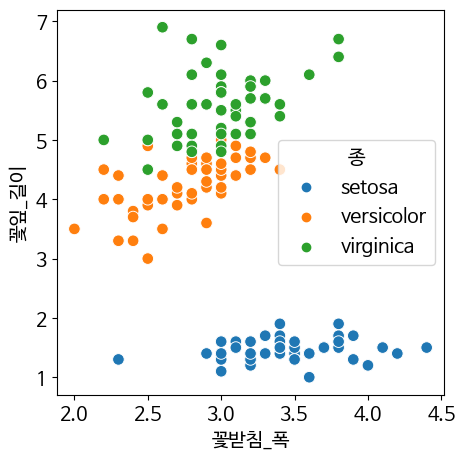

In [34]:
# seaborn을 이용한 산포도 그리기 (1)

plt.figure(figsize=(5, 5))
sns.scatterplot(x='꽃받침_폭', y='꽃잎_길이', hue='종', s=70, data=df_iris)
plt.show()

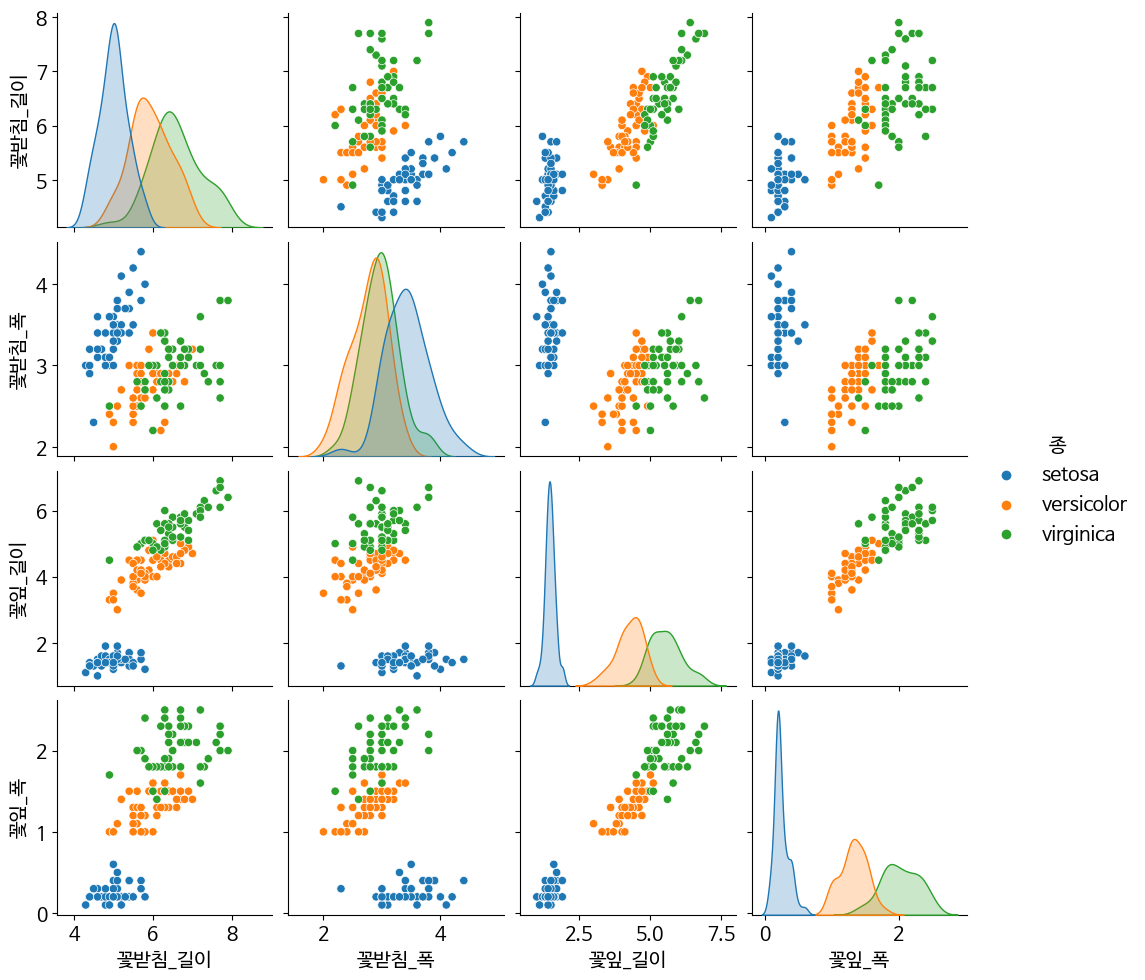

In [35]:
# 모든 필드의 조합으로 산포도 그리기
sns.pairplot(df_iris, hue="종")

plt.show()

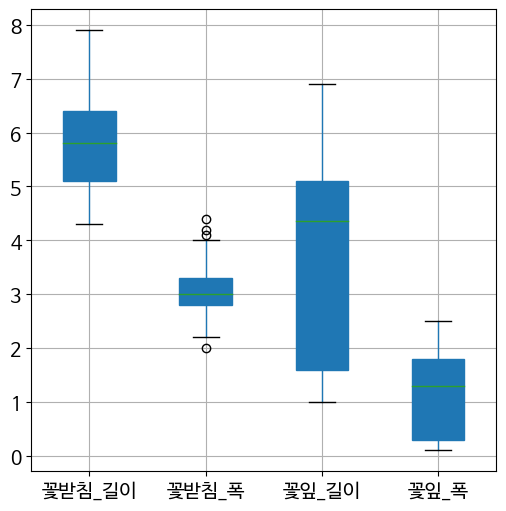

In [36]:
# matplotlib을 이용한 상자 수염 그림 그리기

# 그래프 작도 영역 조정
plt.figure(figsize=(6,6))

# 상자 수염 그림 그리기
df_iris.boxplot(patch_artist=True)
plt.show()

> [pandas] melt 함수
- 데이터프레임을 재구성하여 열들을 행으로 변환

In [58]:
# melt 함수를 이용한 데이터 전처리
w = pd.melt(df_iris, id_vars=['종'])

display(df_iris.head())
# 전처리 결과 확인
display(w.head())

,꽃받침_길이,꽃받침_폭,꽃잎_길이,꽃잎_폭,종
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


,종,variable,value
0,setosa,꽃받침_길이,5.1000
1,setosa,꽃받침_길이,4.9000
2,setosa,꽃받침_길이,4.7000
3,setosa,꽃받침_길이,4.6000
4,setosa,꽃받침_길이,5.0000


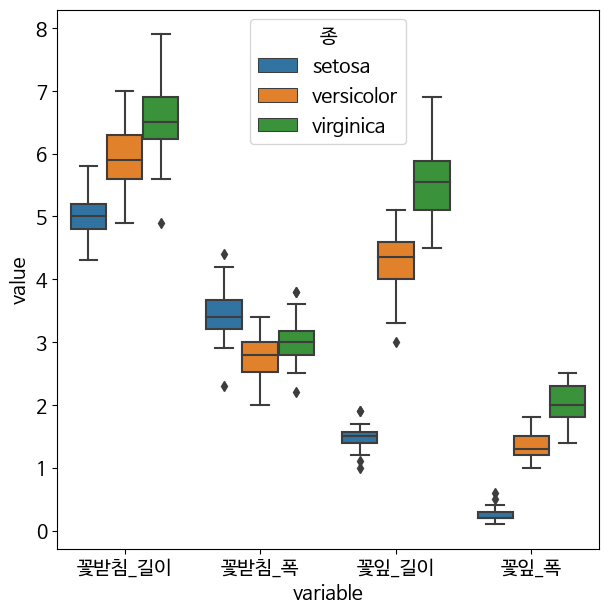

In [60]:
# seaborn을 이용한 상자 수염 그림 그리기

# 인자 hue를 추가해 곷의 종마다 그림을 따로 그리게 한다
plt.figure(figsize=(7, 7))
sns.boxplot(x="variable", y="value", data=w, hue='종')
plt.show()

# 알고리즘 선택하기

scikit-learn
- make_classification : 선형
- make_moons : 초승달형
- make_circles : 원형

In [39]:
# 예제 데이터 생성하기

# 라이브러리 임포트
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

# 선형 데이터
X1, y1 = make_classification(n_features=2, n_redundant=0,
    n_informative=2, random_state=random_seed,
    n_clusters_per_class=1, n_samples=200, n_classes=2)

# 초승달형 데이터 (선형 분리 불가능)
X2, y2 = make_moons(noise = 0.05, random_state=random_seed, n_samples=200)

# 원형 데이터 (선형 분리 불가능)
X3, y3 = make_circles(noise = 0.02, random_state=random_seed, n_samples=200)

# 세 가지 데이터를 DataList 변수에 저장
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N: 데이터의 가짓수
N = len(DataList)

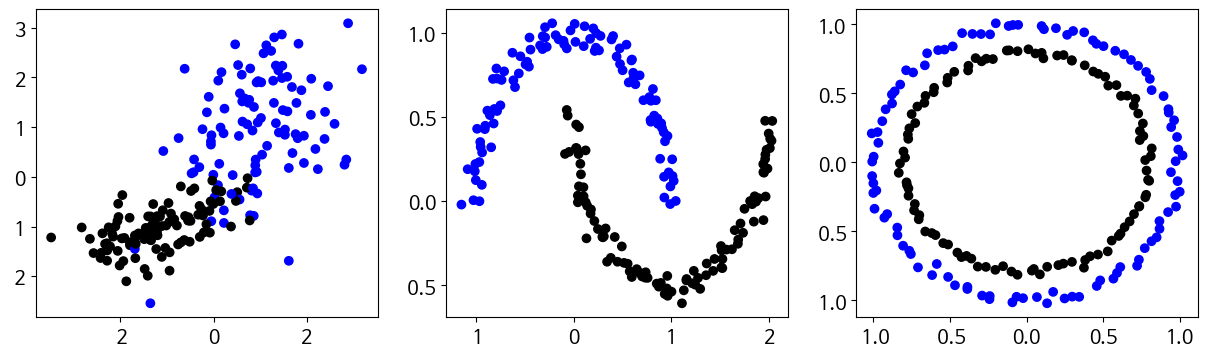

In [40]:
# 산포도 그리기
plt.figure(figsize=(15,4))

# 컬러맵 정의
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

plt.show()

In [41]:
from sklearn.model_selection import train_test_split

# 결정 경계를 그리는 함수
def plot_boundary(ax, x, y, algorithm):
    # 학습 데이터와 검증 데이터 분할하기
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)

    # 컬러맵 정의
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    # 학습
    algorithm.fit(x_train, y_train)
    # 정확도 계산
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)

    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h),
                         np.arange(f2_min, f2_max, h))

    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)

    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')

    text = f'검증:{score_test:.2f}  학습: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text,
            horizontalalignment='right', fontsize=18)


In [42]:
# 산점도와 결정 경계를 그리는 함수

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

> LogisticRegression

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


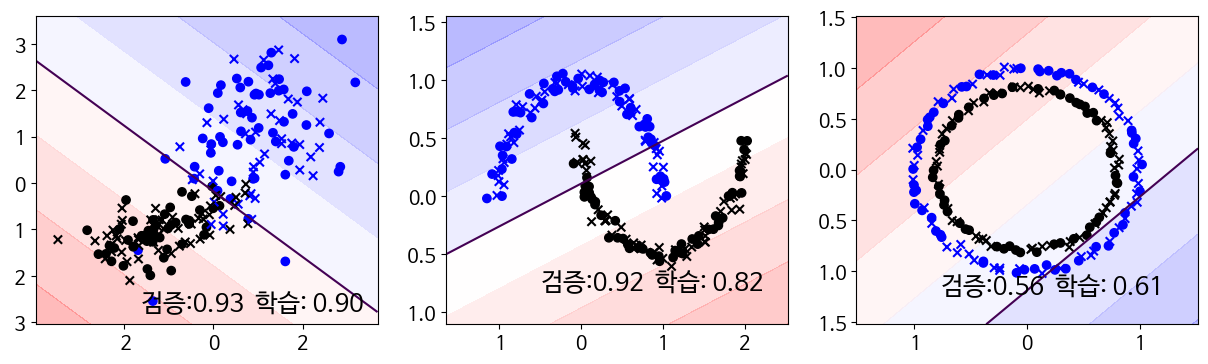

In [43]:
# 로지스틱 회귀 알고리즘을 이용한 분류 결과와 산점도

# 알고리즘 정의
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# 알고리즘의 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출한다
plot_boundaries(algorithm, DataList)

> SVM

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}


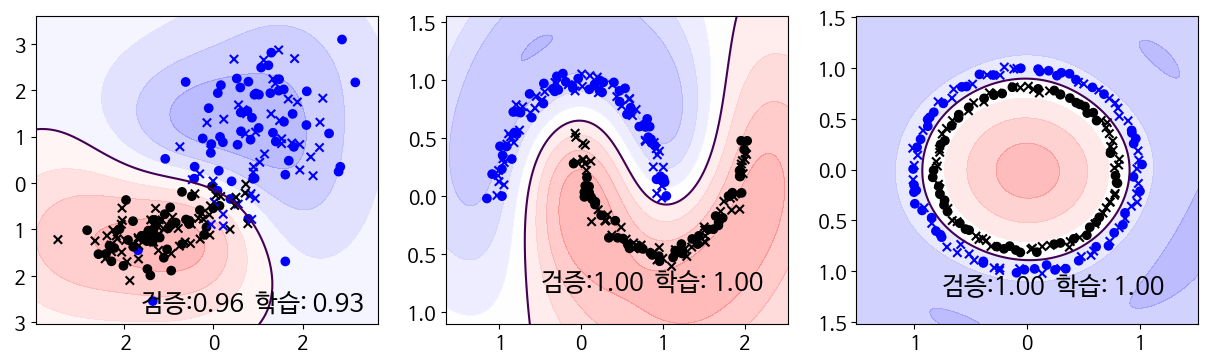

In [44]:
# SVM(커널)을 이용한 분류 결과 및 산점도

# 알고리즘 선택하기
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf', random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

> MLPClassifier

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


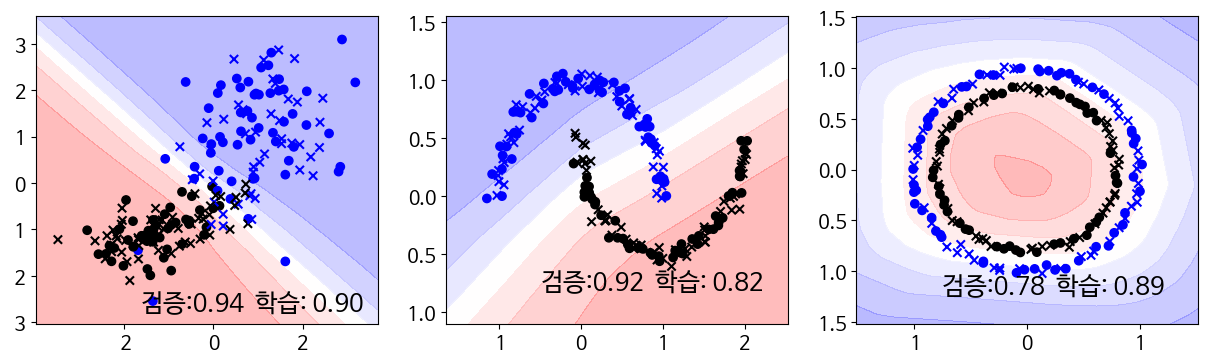

In [45]:
# 신경망을 이용한 분류 결과와 산점도

# 알고리즘 선택하기
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

- hidden_layer_sizes

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


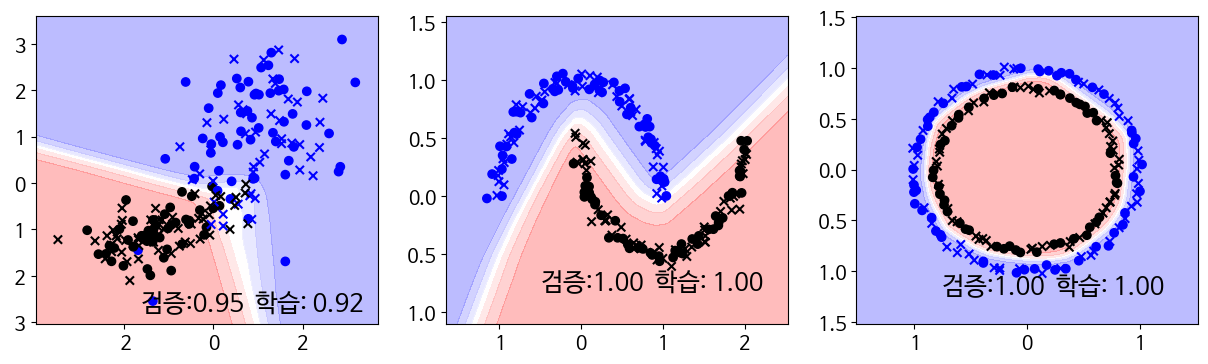

In [46]:
# 신경망을 이용한 분류 결과와 산점도

# 알고리즘 선택하기
# 중간층 노드 수=(100,100)
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(hidden_layer_sizes=(100,100), random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

In [47]:
# 추가 라이브러리 임포트
import seaborn as sns

# 예제 데이터 읽어 들이기
df_iris = sns.load_dataset("iris")

# 데이터 범위를 2종으로 축소
df2 = df_iris[50:150]

# 데이터 분리
X = df2.drop('species', axis=1)
y = df2['species']

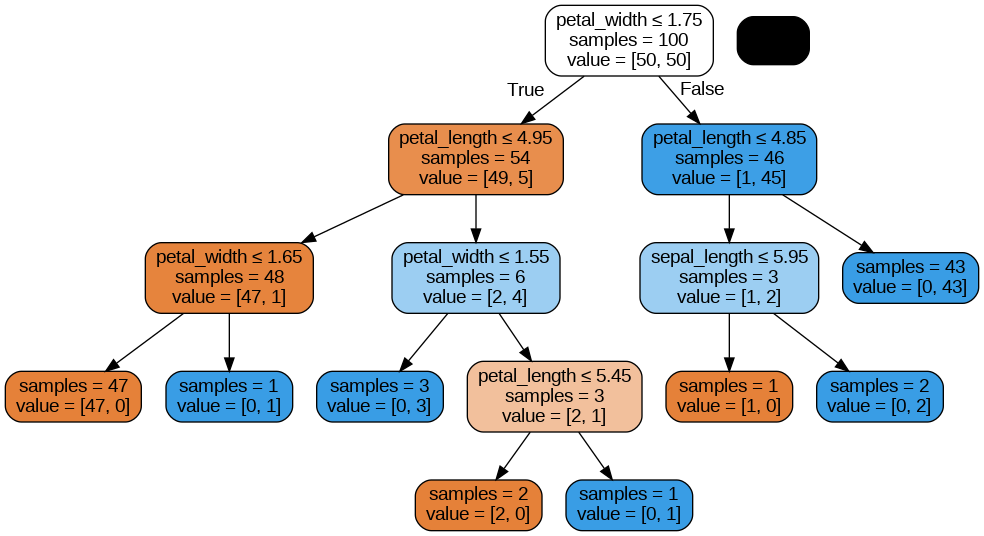

In [48]:
## 역주: 'GraphViz's executables not found' 오류 발생시에는
## https://graphviz.org/download/ 에서 환경에 맞는 버전의 Graphviz를 설치하고
## 아래 코드의 <설치경로>를 자신이 Graphviz를 설치한 경로로 수정한 후 진행하기 바랍니다.

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
#os.environ["PATH"] += os.pathsep + '<설치경로>'

# 학습
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X, y)

# 결정 트리를 그래프 구조로 출력
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( algorithm, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,
        special_characters=True, impurity=False, proportion=False
    )

import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png()) # 의사 결정 나무

> DecisionTreeClassifier

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}


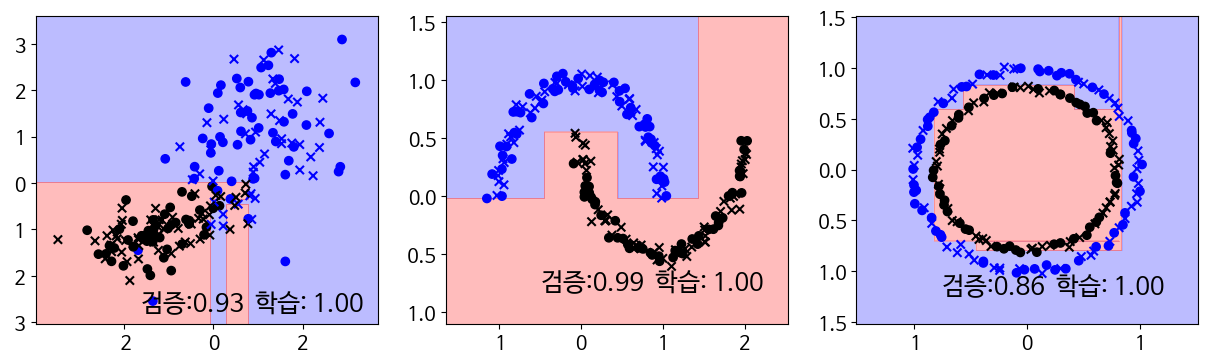

In [49]:
# 결정 트리를 이용한 분류 결과와 산점도

# 알고리즘 선택하기
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

- max_depth

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}


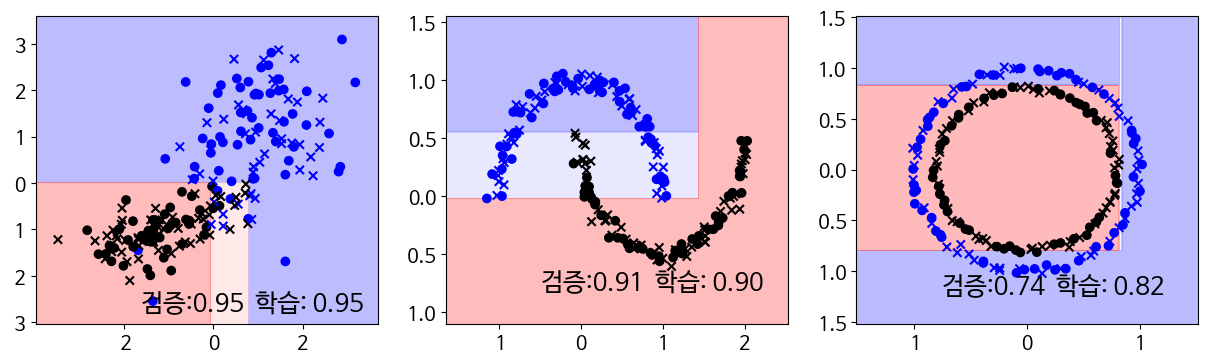

In [50]:
# 결정 트리를 이용한 분류 결과와 산점도(max_depth=3으로 설정)

# 알고리즘 선택하기
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(max_depth=3, random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

> RandomForestClassifier

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


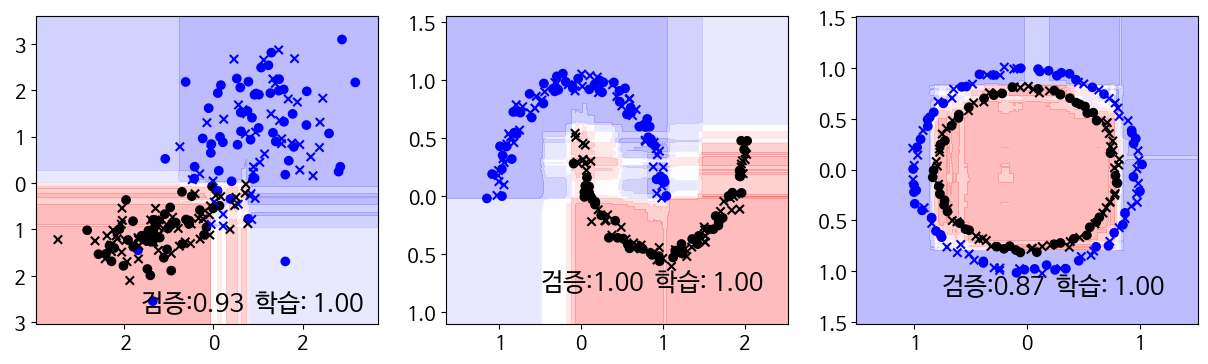

In [51]:
# 랜덤 포레스트를 이용한 분류 결과와 산점도

# 알고리즘 선택하기
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

> XGBoost

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


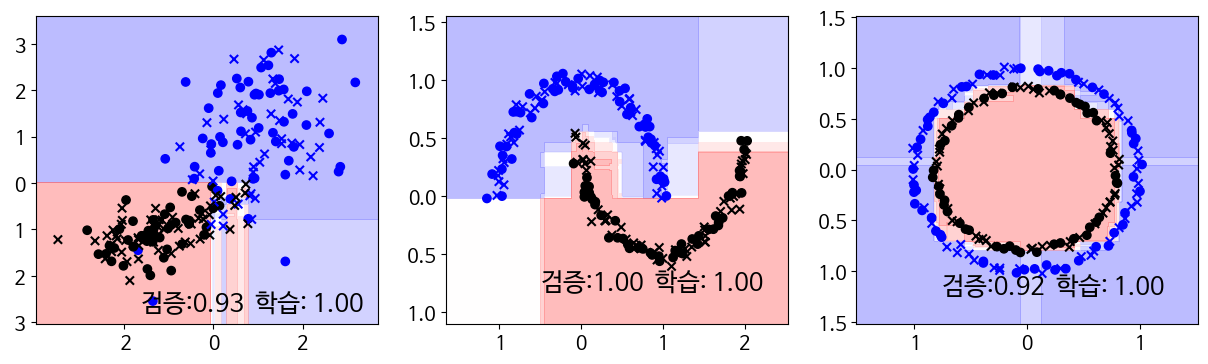

In [52]:
# XGBoost를 이용한 분류 결과와 산점도

# 알고리즘 선택하기
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)

# 알고리즘에 설정된 파라미터 출력
# print(algorithm)
print(algorithm.get_params())

# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

대다수 -> **XGBoost** 사용
- 성능이 가장 좋음
- 계속 버전 업데이트 중